In [1]:
from eda_import import *
from scipy.cluster.hierarchy import leaves_list

In [2]:
TARGET_GENES = pd.read_csv('./reference_data/target_genes_with_type.tsv', sep='\t').Gene.values.tolist()

In [3]:
len(TARGET_GENES)

114

# Visualize FMOU table

In [4]:
res = []
with open('./results_data/cosmic_FMOU_table.tsv', 'rt') as inf:
    for k, line in enumerate(inf):
        if k == 0:
            cols = line.strip('\n').split('\t')
        else:
            res.append(line.strip('\n').strip('\t').split('\t'))

In [5]:
df_fmou = pd.DataFrame(res, columns=cols)

In [6]:
df_fmou.set_index('Gene', drop=True, inplace=True)

In [7]:
df_fmou.head(2)

,ACC,BLCA,BRCA,CESC,CHOL,COAD,DLBC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LAML,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,READ,SARC,SKCM,STAD,TGCT,THCA,THYM,UCEC,UCS,UVM
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABL1,O,,M,OU M,M,OU M,O,O M,OU M,OU M,O,OU M,M,O FM,,O M,OU M,OU M,,,,,OU M,OU M,OU,O M,O M,,OU M,,OU M,OU,
AKT1,,M,M,M,M,M,,M,OU M,M,,M,,O,M,M,M,M,,,,,M,M,M,M,M,,M,M,M,,


In [8]:
df_fmou.shape

(114, 33)

In [9]:
print(np.unique(df_fmou.astype(str).values.ravel()).tolist())

['    ', '   M', '  F ', '  FM', ' U  ', ' U M', 'O   ', 'O  M', 'O FM', 'OU  ', 'OU M', 'OUFM']


In [10]:
# char_code = 'MOUF'
# char_code = 'FOUM'
char_code = 'FMOU'

In [11]:
str_codes = [''.join(_) for _ in list(itertools.product(*['{0}-'.format(_) for _ in char_code]))]

In [12]:
# http://stackoverflow.com/questions/8928240/convert-base-2-binary-number-string-to-int
int_codes = [int(''.join(_), 2) for _ in list(itertools.product('10', '10', '10', '10'))]

In [13]:
print(str_codes)

['FMOU', 'FMO-', 'FM-U', 'FM--', 'F-OU', 'F-O-', 'F--U', 'F---', '-MOU', '-MO-', '-M-U', '-M--', '--OU', '--O-', '---U', '----']


In [14]:
int_codes

[15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [15]:
str2int_dd = dict(zip(str_codes, int_codes))
int2str_dd = dict(zip(str_codes, int_codes))

In [16]:
def convert2binvec(s):
    """convert to binary vector"""
    res = []
    for i in char_code:
        res.append(1 if i in s else 0)
    return res

# assert convert2binvec('OU M') == [1, 1, 0, 1]

In [17]:
ndf = df_fmou.applymap(convert2binvec)

In [18]:
ndf.head(2)

,ACC,BLCA,BRCA,CESC,CHOL,COAD,DLBC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LAML,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,READ,SARC,SKCM,STAD,TGCT,THCA,THYM,UCEC,UCS,UVM
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABL1,"[0, 0, 1, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[0, 1, 1, 1]","[0, 1, 0, 0]","[0, 1, 1, 1]","[0, 0, 1, 0]","[0, 1, 1, 0]","[0, 1, 1, 1]","[0, 1, 1, 1]","[0, 0, 1, 0]","[0, 1, 1, 1]","[0, 1, 0, 0]","[1, 1, 1, 0]","[0, 0, 0, 0]","[0, 1, 1, 0]","[0, 1, 1, 1]","[0, 1, 1, 1]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 1, 1, 1]","[0, 1, 1, 1]","[0, 0, 1, 1]","[0, 1, 1, 0]","[0, 1, 1, 0]","[0, 0, 0, 0]","[0, 1, 1, 1]","[0, 0, 0, 0]","[0, 1, 1, 1]","[0, 0, 1, 1]","[0, 0, 0, 0]"
AKT1,"[0, 0, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[0, 1, 1, 1]","[0, 1, 0, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[0, 0, 0, 0]","[0, 0, 1, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]"


# Cluster by gene

In [19]:
data_mat = ndf.apply(lambda row: np.concatenate(row.values).tolist(), axis=1).values

In [20]:
# convert to 2D array
data = np.array(data_mat.tolist())

In [21]:
data.shape

(114, 132)

In [22]:
assert 33 * 4 == 132

In [23]:
Z_by_gene = linkage(data, metric='hamming')

In [24]:
# _ = dendrogram(Z_by_gene, labels=ndf.index.values)

In [25]:
assert data.shape == (114, 132)

In [26]:
gene_idxes = leaves_list(Z_by_gene)

# Cluster by disease

In [27]:
data_mat = ndf.apply(lambda row: np.concatenate(row.values).tolist()).values

In [28]:
# convert to 2D array
data = np.array(data_mat.tolist())

In [29]:
data.shape

(33, 456)

In [30]:
assert 114 * 4 == 456

In [31]:
Z_by_dise = linkage(data, metric='hamming')

In [33]:
assert data.shape == (33, 456)

In [34]:
dise_idxes = leaves_list(Z_by_dise)

In [35]:
# _ = dendrogram(Z_by_dise, labels=ndf.columns.values)

In [36]:
dise_idxes

array([ 2,  4, 12,  1, 14, 21, 18, 32, 29, 27, 19, 20, 13, 28,  8, 23, 24,
       22,  3, 11,  7,  5, 26, 30, 25, 15, 16,  9, 17,  6, 31,  0, 10],
      dtype=int32)

In [47]:
odf = ndf.iloc[gene_idxes][ndf.columns[dise_idxes]]

### Convert to int for plotting

In [48]:
pdf = odf.applymap(lambda v: int(''.join(map(str, v)), 2))
pdf.head(2)

,BRCA,CHOL,KIRP,BLCA,LGG,PCPG,MESO,UVM,THYM,TGCT,OV,PAAD,LAML,THCA,GBM,READ,SARC,PRAD,CESC,KIRC,ESCA,COAD,STAD,UCEC,SKCM,LIHC,LUAD,HNSC,LUSC,DLBC,UCS,ACC,KICH
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALK,4,4,4,4,0,0,0,0,0,0,0,0,14,12,6,4,12,4,4,4,4,6,4,4,4,4,12,4,12,8,4,4,4
RTCA,0,0,0,0,0,0,0,0,4,0,0,0,4,4,0,0,0,0,0,4,4,4,4,0,4,4,0,4,0,0,0,0,0


In [49]:
uniq_vals = np.sort(np.unique(pdf.values))
uniq_vals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 12, 14, 15])

In [50]:
qdf = pdf.T

In [51]:
qdf.head()

Gene,ALK,RTCA,FAS,CD47,CCNE1,AKT2,GNAS,FBXW7,AKT1,CDH1,BRAF,VHL,MAX,MAP2K2,CHURC1,RAB10,MYD88,GNAQ,GNA11,AMER1,TXNL4A,PRKAR1A,PIK3CA,NFE2L2,MSH2,KRAS,TSC2,TP53,SMARCB1,NSUN5,MDM4,NFYA,MLH1,MITF,MAP2K4,MAP2K1,HRAS,CTNNB1,TSC1,TRAF7,SUFU,CYLD,CEBPA,SEC24A,MDM2,HNF1A,ERBB2,CDKN2C,ATM,TET2,STK17A,MYCL,SOCS1,RET,NFE2L3,FGF2,BRCA1,EZH2,DRAM1,BRCA2,RNF43,NOTCH2,MET,FGFR3,EGFR,CCND2,TERT,REL,CCND1,JUN,NKX2-1,IDH1,GATA3,MYC,WT1,TNFAIP3,SOX2,PTCH1,NOTCH1,PDGFRA,KIT,SMO,PAX5,MYCN,IGF2BP1,FGFR2,FLT3,TSHR,CARD11,KDR,CDKN2A,BCL6,PIK3R1,APC,SMARCA4,NRAS,KDM6A,ABL1,STK11,NF2,MSH6,AXIN1,MEN1,KMT2A,DICER1,STAT3,NF1,SMAD4,EP300,BAP1,CREBBP,PTEN,RB1,SETD2
BRCA,4,0,0,0,0,4,4,4,4,4,4,4,0,4,0,0,4,4,4,4,0,4,4,4,4,4,4,4,0,4,4,0,4,0,4,4,4,0,4,4,4,0,4,0,0,4,4,0,4,4,4,0,0,4,0,0,4,4,0,4,0,4,4,0,4,4,0,0,0,0,0,4,4,4,0,0,0,4,12,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
CHOL,4,0,0,0,0,4,4,4,4,4,4,4,4,0,0,0,0,4,4,0,4,4,4,4,0,4,4,4,0,0,0,0,0,0,4,4,0,4,4,4,0,4,0,4,4,4,4,0,4,4,0,0,0,4,0,0,4,4,0,4,4,4,4,0,4,0,4,0,0,4,4,4,4,0,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,0,4,4,4,4,4,4,4,4,4,0,4
KIRP,4,0,0,0,4,4,0,4,0,4,4,4,0,4,0,0,0,0,0,0,0,4,4,4,0,4,4,4,4,0,4,4,4,0,4,0,0,4,4,0,4,0,4,4,0,4,4,0,4,4,0,0,0,0,0,0,0,0,0,4,0,4,4,4,0,4,4,0,0,0,0,0,0,0,0,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,0,4,4,4,4,4,4,4,4
BLCA,4,0,0,4,0,0,0,4,4,4,4,0,4,0,0,4,0,0,0,0,0,0,4,4,0,4,4,4,0,0,0,4,0,4,0,4,4,4,4,0,4,0,0,4,4,4,4,0,4,4,0,4,0,0,0,0,4,0,0,0,0,4,4,12,4,0,0,0,0,0,0,4,4,0,0,0,0,4,0,0,4,0,0,0,0,4,0,0,4,4,4,4,4,4,4,4,4,0,0,4,4,0,0,4,4,0,4,4,4,4,4,4,4,4
LGG,0,0,0,0,0,0,0,0,4,0,12,0,4,0,0,0,0,0,0,0,0,0,4,4,0,4,4,4,0,0,0,0,0,0,0,0,4,0,4,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,4,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,4,4,0,4,0,0,4,4,0,0,4,4,0,4,0,0,0,4,0,0,4,4,4,4,4


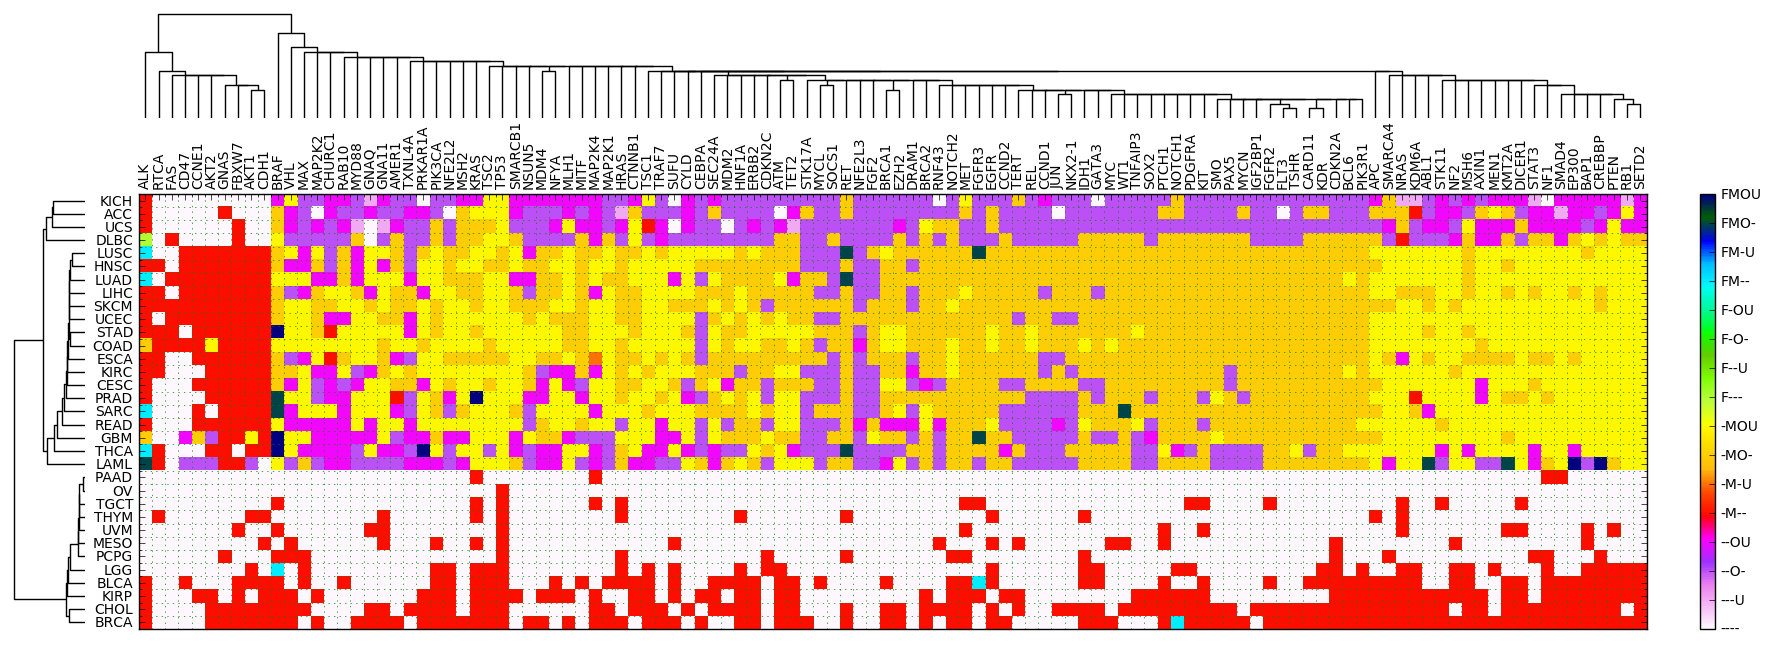

In [55]:
# http://stackoverflow.com/questions/24190858/matplotlib-move-ticklabels-between-ticks
fig = plt.figure(figsize=(22, 8), facecolor='white')

gs = gridspec.GridSpec(2, 3, height_ratios=[1,4], width_ratios=[1, 20, 0.2], 
                       wspace=0.1, # horizontal space
                       hspace=0.28  # vertical space
                      )

ax_by_gene = fig.add_subplot(gs[1])
col_func = lambda x: 'black'
_ = dendrogram(Z_by_gene, ax=ax_by_gene, labels=ndf.index.values, leaf_font_size=10, link_color_func=col_func)
ax_by_gene.set_frame_on(False)
ax_by_gene.axes.get_yaxis().set_visible(False)

ax_by_dise = fig.add_subplot(gs[3])
_ = dendrogram(Z_by_dise, ax=ax_by_dise, orientation='left', labels=ndf.columns.values,  link_color_func=col_func)
ax_by_dise.set_frame_on(False)
ax_by_dise.axes.get_xaxis().set_visible(False)

ax_mut = fig.add_subplot(gs[4])
ax_mut.xaxis.tick_top()
im = ax_mut.imshow(qdf.values,
                   origin='lower',
                   interpolation='none',
                   extent=list(ax_by_gene.get_xlim()) + list(ax_by_dise.get_ylim()),
                   aspect='auto',
                   cmap='gist_ncar_r', 
                   vmin=0, vmax=15)

# ticklabels follow major ticks
_ = ax_mut.set_xticks(ax_by_gene.get_xticks(), minor=False)
_ = ax_mut.set_yticks(ax_by_dise.get_yticks(), minor=False)
# ax_mut.minorticks_off()

# http://stackoverflow.com/questions/14852821/aligning-rotated-xticklabels-with-their-respective-xticks
xtick_labels = qdf.columns.values.tolist()
ytick_labels = qdf.index.values.tolist()

# make sure the text match
assert xtick_labels == [_.get_text() for _ in ax_by_gene.get_xticklabels()]
assert ytick_labels == [_.get_text() for _ in ax_by_dise.get_yticklabels()]

ax_by_gene.set_xticklabels([])
ax_by_dise.set_yticklabels([])

_ = ax_mut.set_xticklabels(xtick_labels, rotation=90, ha='center')
_ = ax_mut.set_yticklabels(ytick_labels, va='center')

xticks = (ax_by_gene.get_xticks()[1:] + ax_by_gene.get_xticks()[:-1]) / 2
yticks = (ax_by_dise.get_yticks()[1:] + ax_by_dise.get_yticks()[:-1]) / 2
_ = ax_mut.set_xticks(xticks, minor=True)
_ = ax_mut.set_yticks(yticks, minor=True)
ax_mut.grid(color='green', which='minor')

ax_leg = fig.add_subplot(gs[5])
# ax_leg.set_frame_on(False)
# ax_leg.set_axis_off()
cb = fig.colorbar(im, cax=ax_leg)
# _ = cb.ax.set_yticklabels(str_codes)
_ = cb.set_ticks(int_codes)
_ = cb.set_ticklabels(str_codes)


for ax in [ax_by_gene, ax_by_dise, ax_mut, ax_leg]:
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)

# plt.savefig('./results/figs/candidate_genes_mutational_profile_{0}.jpg'.format(char_code), 
#             dpi=200, bbox_inches='tight')